In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from pyclustering.nnet.som import type_conn
from matrixprofile import matrixProfile, motifs
# local code
# import sys
# sys.path.insert(0, os.path.abspath('../src'))
import dtwsom

## 🎲 *Loading data*

In [2]:
D3011_data = np.load('dataset_TipAu_Au.npz')

In [3]:
D3011_data.keys()

KeysView(NpzFile 'dataset_TipAu_Au.npz' with keys: smoothedMeasuredHeight_m, vDeflection_N, height_m, measuredHeight_m, seriesTime_s...)

In [4]:
list(D3011_data.keys())

['smoothedMeasuredHeight_m',
 'vDeflection_N',
 'height_m',
 'measuredHeight_m',
 'seriesTime_s',
 'time_s']

In [5]:
force_data = D3011_data['vDeflection_N']

In [6]:
force_data.shape

(1024, 800)

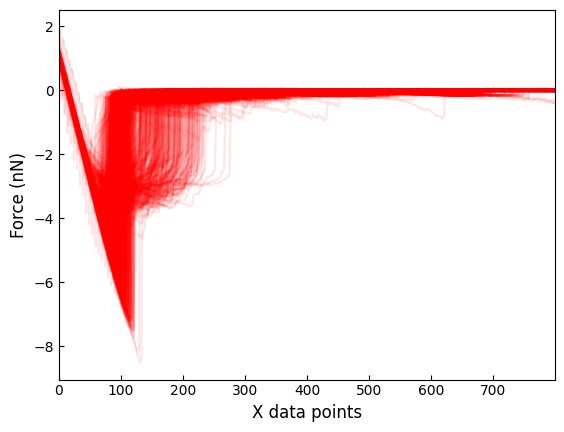

In [7]:
fig,ax = plt.subplots(dpi=100)

for curve in force_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_xlim([0,force_data.shape[1]-1])

#fig.savefig('../data/figures/pca_examples/D3011_curves.png',dpi=300,bbox_inches='tight')

plt.show()

***

## ➗ *Split train and test*

In [8]:
train_data = force_data[:200]
test_data = force_data[200:]

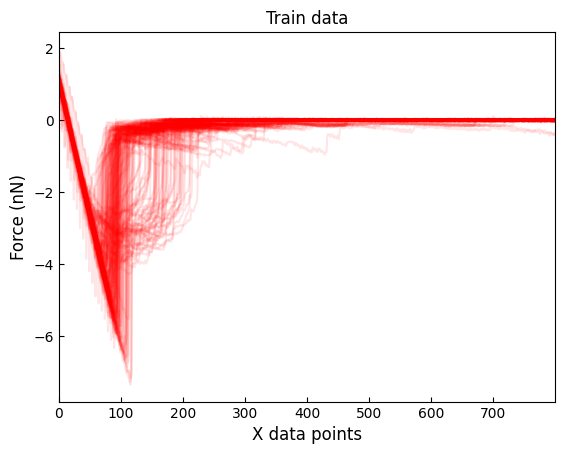

In [9]:
fig,ax = plt.subplots(dpi=100)

for curve in train_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Train data")

ax.set_xlim([0,train_data.shape[1]-1])

plt.show()

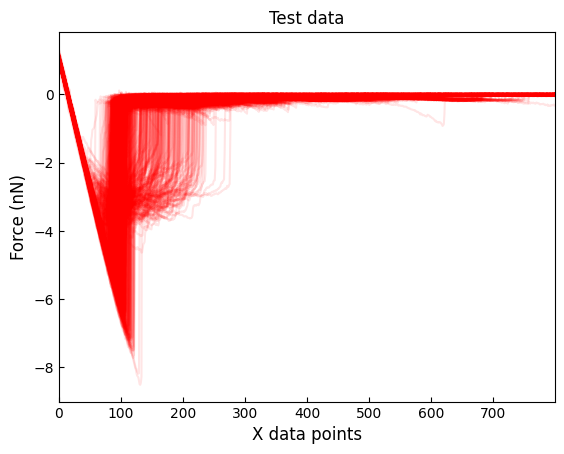

In [10]:
fig,ax = plt.subplots(dpi=100)

for curve in test_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Test data")

ax.set_xlim([0,test_data.shape[1]-1])

plt.show()

***

## 🧬 *Motif discovery with matrix profile*

In [11]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

800 200


In [12]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

160000

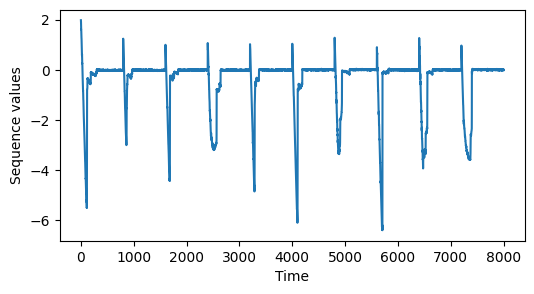

In [13]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(8000), joined_data[:8000])
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

In [14]:
%%time
mp = matrixProfile.stomp(joined_data, size)

CPU times: user 3min 39s, sys: 41 s, total: 4min 20s
Wall time: 4min 20s


In [15]:
mp 

(array([5.83388999, 5.66454074, 5.48883302, ..., 2.59879155, 2.59866395,
        2.59893217]),
 array([23987., 23988., 23989., ..., 57598., 57599., 57600.]))

In [16]:
len(mp)

2

 Matrix Profile: 

In [17]:
mp[0]

array([5.83388999, 5.66454074, 5.48883302, ..., 2.59879155, 2.59866395,
       2.59893217])

In [18]:
len(mp[0])

159201

Index of Matrix Profile:

In [19]:
mp[1]

array([23987., 23988., 23989., ..., 57598., 57599., 57600.])

In [20]:
len(mp[1])

159201

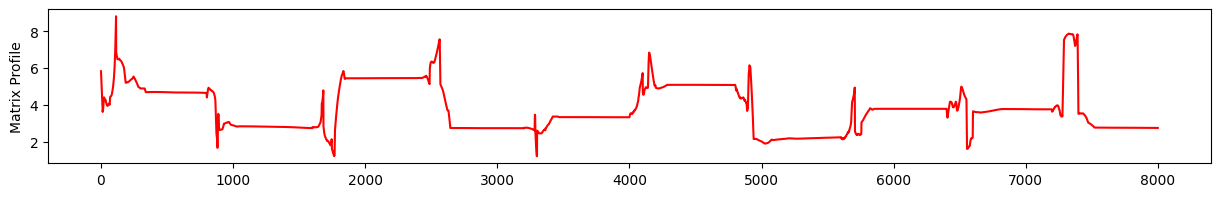

In [21]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [22]:
%%time
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000) # Computes the top k motifs from a matrix profile

CPU times: user 684 ms, sys: 169 ms, total: 853 ms
Wall time: 801 ms


mtfs = motifs (list of lists of indexes representing the motif starting locations)

In [23]:
print(mtfs) # Return the index of the main motif and its main neighbors
print()
print(len(mtfs))

[[24105, 144105, 153705, 156105], [8108, 107308, 148108, 151308], [30429, 54429, 103229, 158429], [3299, 85699], [1765, 6565, 50565, 84165, 88965, 113765, 144965], [41751, 62550, 77750, 105752], [25696, 43296, 91293, 111296, 147296, 155295], [16068, 20868, 24867, 142466, 148866, 154463], [28092, 28892, 32892, 157693], [20090, 53690, 64090, 72890, 75290, 80090, 109690, 124889, 129690], [33598, 42397, 63196, 65595, 78396, 91998, 106398, 110398, 137593], [10011, 27608, 30009, 32408, 49208, 85206, 102809, 105204, 157209], [17758, 26558, 47358, 66560, 95358, 128158, 132960, 135358], [881, 36081, 68881, 81681, 100081], [12889, 146491], [10614, 65013, 72212, 130613, 137011, 150615], [5723, 49722, 57722, 100922, 118522], [9308, 26106, 29307, 39709, 73307, 80504, 104507, 111707, 142903, 155704], [8654, 87051, 107849, 151855, 156655], [5026, 15431, 86634, 141829], [86108, 98117, 103709, 144513, 147707], [35213, 40811, 44814, 46410, 68014, 69611], [23600, 153198], [2677, 34675, 40273, 44276, 1090

motif_d = distances (list of minimum distances for each motif)

In [24]:
print(motif_d)
print()
print(len(motif_d))

[0.9948731341957722, 1.1584478010994752, 1.164400114028068, 1.2217041530094255, 1.2307959369481518, 1.2860721662987318, 1.2925363462565924, 1.5263906813534924, 1.551342205026742, 1.598526055956044, 1.639870600157032, 1.6565391341424902, 1.6697301301078682, 1.6810903757506617, 1.6851081610089245, 1.7463900348737755, 1.7691746788935958, 1.8035344863555707, 1.8052311868650535, 1.90677736970887, 1.960715805066757, 2.030094740474431, 2.035081254919245, 2.0390558445640226, 2.041495304472009, 2.1256224098062346, 2.2324089942882277, 2.251856997566126, 2.2520680573462712, 2.298312048920553, 2.341310173453072, 2.3446612686169797, 2.3569309561872798, 2.3578628698945416, 2.4796215329875544, 2.5728364642684065, 2.6241094396820133, 2.6748950307862476, 2.695058345749412, 2.735705643343188, 2.7659010827061437, 2.7712561808259353, 2.8107999545110722, 2.838755976084304, 2.961546667005933, 3.0140521462806396, 3.078420137670728, 3.094700640233397, 3.1423238643762326, 3.170909007319703, 3.19644062471635, 3

In [25]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [26]:
len(motif_center_list) 

71

***

## 🗺️ *SOM Training*

##### How the structure type affect the results? 

*Possibilities* ([Matrix Profile Github](https://github.com/target/matrixprofile-ts)):
1. grid_four ("Standard"): Grid type of connections when each oscillator has connections with left, upper, right, lower neighbors.
2. honeycomb: Grid type of connections when each oscillator has connections with left, upper-left, upper-right, right, right-lower, lower-left neighbors.
3. func_neighbor: Grid type of connections when existance of each connection is defined by the SOM rule on each step of simulation.
4. grid_eight: Grid type of connections when each oscillator has connections with left, upper-left, upper, upper-right, right, right-lower, lower, lower-left neighbors.


In [27]:
%time
rows = 3
cols = 3
structure = type_conn.grid_eight # enumeration of connection types for SOM (inheritance of pyclustering)
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [28]:
%%time
network.train(motif_center_list, 50)

Epoch 1 achieved an average quantization error of 5.4538
Epoch 2 achieved an average quantization error of 5.973
Epoch 3 achieved an average quantization error of 5.1729
Epoch 4 achieved an average quantization error of 4.9557
Epoch 5 achieved an average quantization error of 4.8879
Epoch 6 achieved an average quantization error of 4.8716
Epoch 7 achieved an average quantization error of 4.8493
Epoch 8 achieved an average quantization error of 4.8775
Epoch 9 achieved an average quantization error of 4.8725
Epoch 10 achieved an average quantization error of 4.8771
Epoch 11 achieved an average quantization error of 4.9072
Epoch 12 achieved an average quantization error of 4.8846
Epoch 13 achieved an average quantization error of 4.8842
Epoch 14 achieved an average quantization error of 4.7183
Epoch 15 achieved an average quantization error of 4.5412
Epoch 16 achieved an average quantization error of 4.5379
Epoch 17 achieved an average quantization error of 4.5317
Epoch 18 achieved an ave

50

***

## *Analysis of the results*

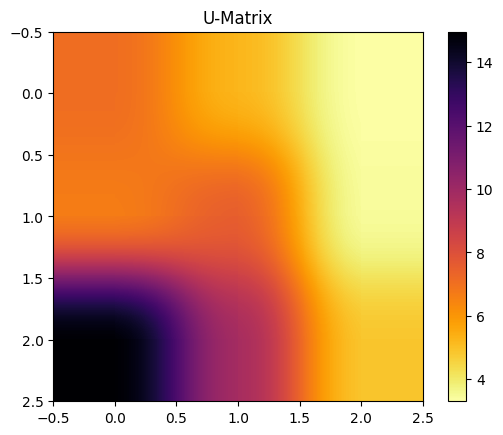

In [29]:
network.show_distance_matrix()

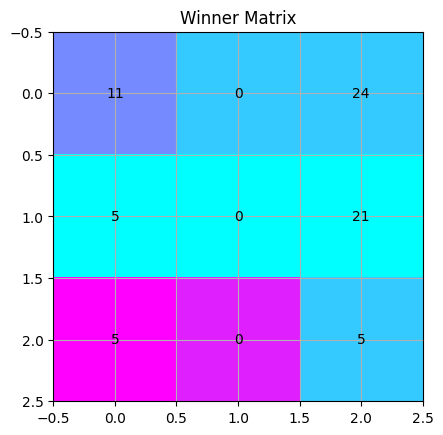

In [30]:
network.show_winner_matrix()

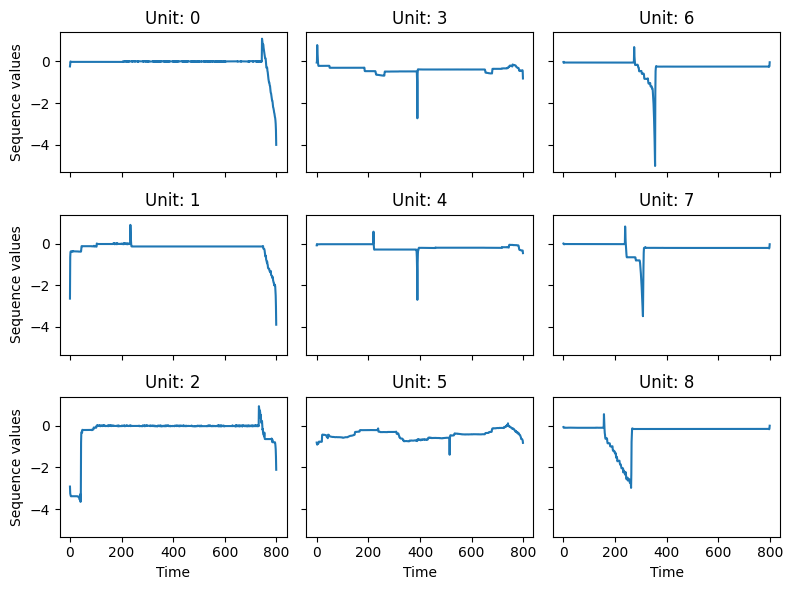

In [31]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(8, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3) # round numbers down to the nearest integer:
    #math.ceil: round a number UP to the nearest integer
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_title("Unit: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Sequence values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

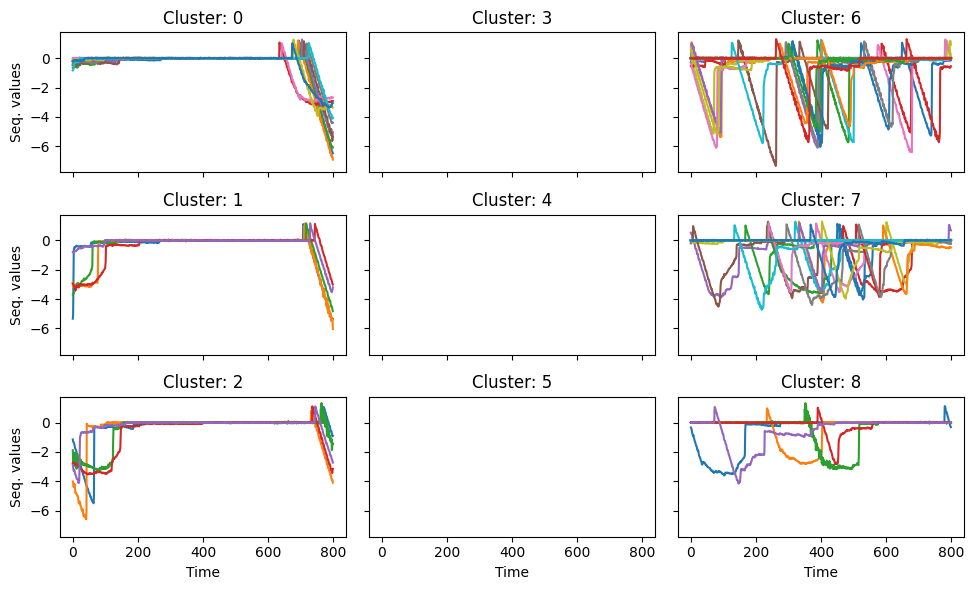

In [32]:
n = rows
n_neurons = network._size
fig, axs = plt.subplots(n,n,figsize=(10, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/n)
    row = neuron_index % n
    cluster_list = network.capture_objects[neuron_index]
    for member_index in cluster_list:
        axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
    axs[row, col].set_title("Cluster: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Seq. values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

### Cluster 6

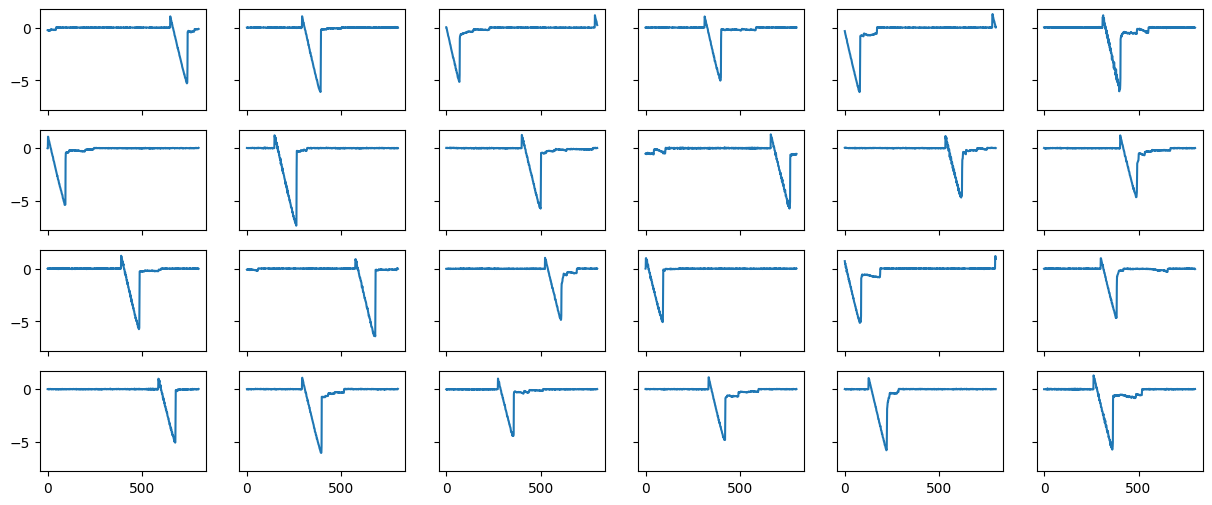

In [34]:
fig, axs = plt.subplots(4,6 ,figsize=(15, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[6]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/4)
    row = i % 4
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 7

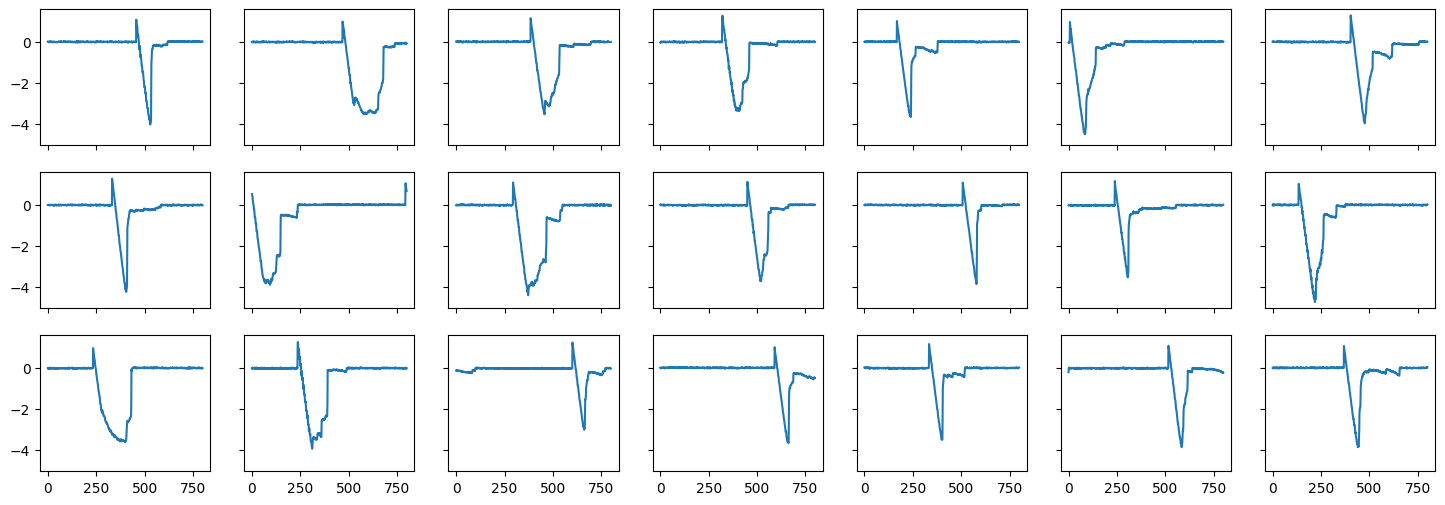

In [40]:
fig, axs = plt.subplots(3,7 ,figsize=(18, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[7]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/3)
    row = i % 3
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 8

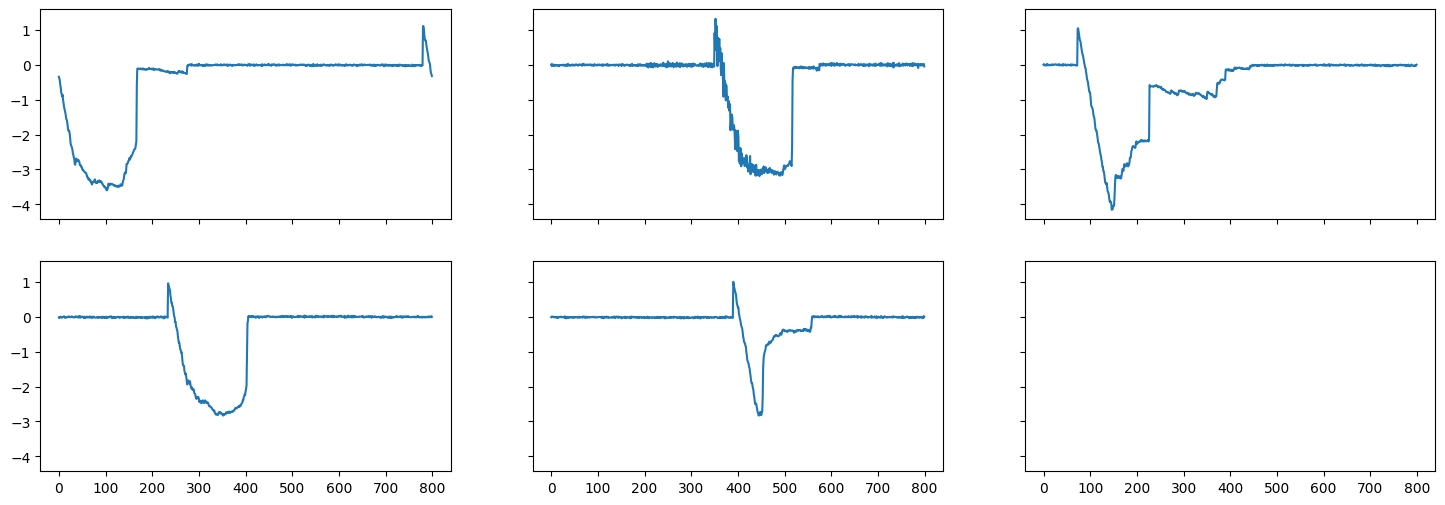

In [41]:
fig, axs = plt.subplots(2,3 ,figsize=(18, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[8]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()